In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\Riddhima\Downloads\Salary_Data.csv")

In [4]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


C:\Users\Riddhima\AppData\Local\Temp\ipykernel_1332\738670369.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Salary"])


<Axes: xlabel='Salary', ylabel='Density'>

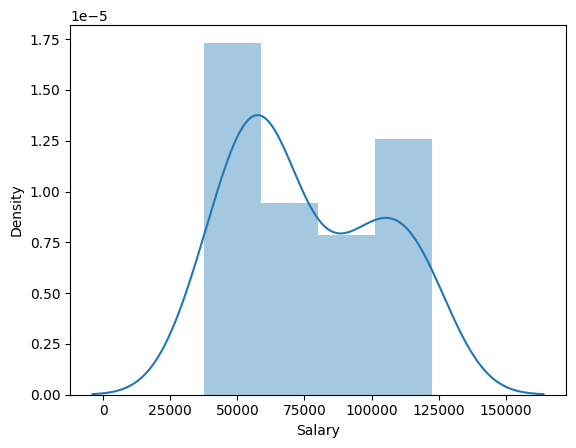

In [6]:
sns.distplot(df["Salary"])

C:\Users\Riddhima\AppData\Local\Temp\ipykernel_1332\1382351491.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["YearsExperience"])


<Axes: xlabel='YearsExperience', ylabel='Density'>

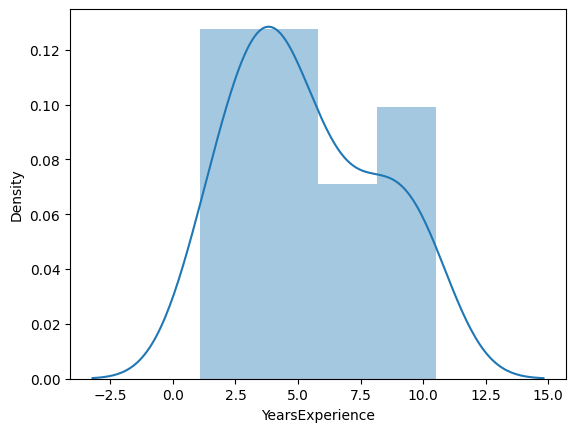

In [7]:
sns.distplot(df["YearsExperience"])

In [8]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [9]:
df =df.rename({"YearsExperience":"years_exp","Salary":"salary_hike"},axis=1)
df

,years_exp,salary_hike
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


<Axes: xlabel='years_exp', ylabel='salary_hike'>

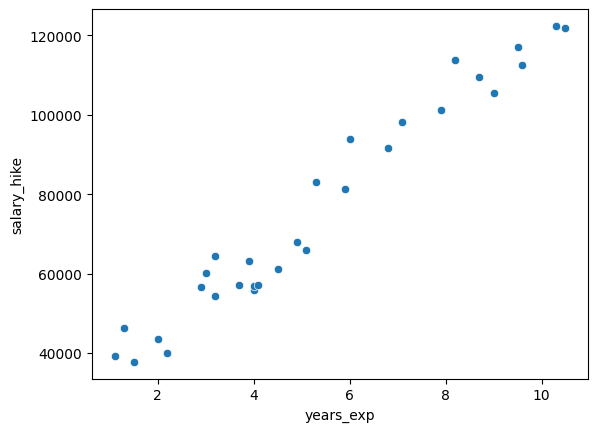

In [10]:
sns.scatterplot(x=df.years_exp, y=df.salary_hike)

In [11]:
x = np.array(df["years_exp"]).reshape(-1,1)
print("Dimension: ",x.ndim)
print("Shape: ",x.shape)

Dimension:  2
Shape:  (30, 1)


In [12]:
y =np.array(df["salary_hike"]).reshape(-1,1)
print("Dimension: ",y.ndim)
print("Shape: ",y.shape)

Dimension:  2
Shape:  (30, 1)


In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [14]:
print("Lenth of X_train: ",len(x_train))
print("Lenth of X_test: ",len(x_test))
print("Lenth of Y_train: ",len(y_train))
print("Lenth of Y_test: ",len(y_test))

Lenth of X_train:  24
Lenth of X_test:  6
Lenth of Y_train:  24
Lenth of Y_test:  6


In [15]:
x_test

array([[4.1],
       [9. ],
       [2.9],
       [4. ],
       [7.9],
       [7.1]])

In [16]:
y_test

array([[ 57081.],
       [105582.],
       [ 56642.],
       [ 55794.],
       [101302.],
       [ 98273.]])

In [17]:
from sklearn.linear_model import LinearRegression
LR= LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [18]:
LR.score(x_test,y_test)

0.9364369405019942

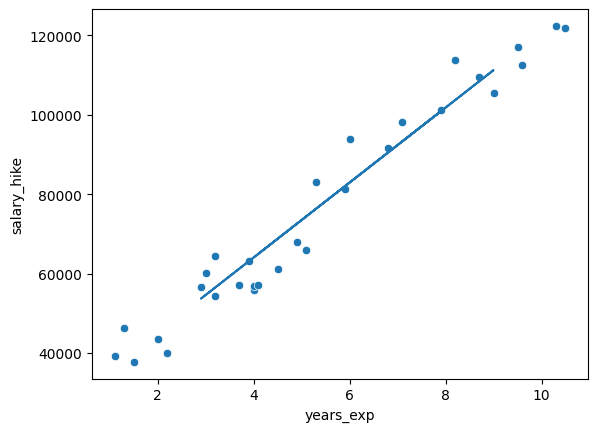

In [19]:
sns.scatterplot(x=df.years_exp,y=df.salary_hike)
plt.plot(x_test,LR.predict(x_test))
plt.show()

In [20]:
LR.coef_

array([[9439.94318559]])

In [21]:
LR.intercept_

array([26295.29448801])

In [22]:
y_predict= np.round(LR.predict(x_test),2)
y_predict[0:,0]

array([ 64999.06, 111254.78,  53671.13,  64055.07, 100870.85,  93318.89])

In [23]:
x_test[0:,0]

array([4.1, 9. , 2.9, 4. , 7.9, 7.1])

In [24]:
y_test[0:,0]

array([ 57081., 105582.,  56642.,  55794., 101302.,  98273.])

In [25]:
df_1 = {"Test_YearsExperince": x_test[0:,0],"Actual_salary":y_test[0:,0],"predicted_salary":y_predict[0:,0]}
df_1 =pd.DataFrame(df_1)


In [26]:
df_1.head()

,Test_YearsExperince,Actual_salary,predicted_salary
0,4.1,57081.0,64999.06
1,9.0,105582.0,111254.78
2,2.9,56642.0,53671.13
3,4.0,55794.0,64055.07
4,7.9,101302.0,100870.85


In [27]:
from sklearn.metrics import mean_squared_error
linear_model = smf.ols("y~x",data=df).fit()
# Calculate RMSE using scikit-learn's mean_squared_error function
rmse = np.sqrt(mean_squared_error(y_test, y_predict))

print("Root Mean Squared Error (RMSE):", rmse)
score={}

score = {'original score': rmse}




Root Mean Squared Error (RMSE): 5725.3318594995


In [28]:
linear_model.params

Intercept    25792.200199
x             9449.962321
dtype: float64

In [29]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 06 Feb 2024   Prob (F-statistic):           1.14e-20
Time:                        11:33:25   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
x           9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming x and y are your features and target variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create copies of the datasets for transformations
x_train_copy, x_test_copy, y_train_copy, y_test_copy = x_train.copy(), x_test.copy(), y_train.copy(), y_test.copy()

# Apply log transformation
x_train_copy_log = np.log(x_train_copy)
y_train_copy_log = np.log(y_train_copy)
x_test_copy_log = np.log(x_test_copy)
y_test_copy_log = np.log(y_test_copy)

# Apply square transformation
y_train_copy_square = y_train_copy**2
y_test_copy_square = y_test_copy**2
x_train_copy_square = x_train_copy**2
x_test_copy_square = x_test_copy**2


# Apply exponential transformation after scaling

# Scale features and target for exponential transformation
x_train_scaled = x_train_copy / np.max(np.abs(x_train_copy))
y_train_scaled = y_train_copy / np.max(np.abs(y_train_copy))
x_test_scaled = x_test_copy / np.max(np.abs(x_test_copy))
y_test_scaled = y_test_copy / np.max(np.abs(y_test_copy))

# Apply exponential transformation
x_train_copy_exp = np.exp(x_train_scaled)
y_train_copy_exp = np.exp(y_train_scaled)
x_test_copy_exp = np.exp(x_test_scaled)
y_test_copy_exp = np.exp(y_test_scaled)


# Fit linear regression models to each transformed dataset
model_original=LinearRegression().fit(x_train, y_train)
model_log = LinearRegression().fit(x_train_copy_log, y_train_copy_log)
model_square = LinearRegression().fit(x_train_copy_square, y_train_copy_square)
model_exp = LinearRegression().fit(x_train_copy_exp, y_train_copy_exp)

# Predict on the test set for each model
y_predict = model_original.predict(x_test)
y_predict_log = model_log.predict(x_test_copy_log)
y_predict_square = model_square.predict(x_test_copy_square)
y_predict_exp = model_exp.predict(y_test_copy_exp)

# Calculate RMSE for each transformed dataset
rmse = np.sqrt(mean_squared_error(y_test, y_predict))
score['original score']=rmse
rmse_log = np.sqrt(mean_squared_error(y_test_copy, y_predict_log))
score['log tranform']=rmse_log
rmse_square = np.sqrt(mean_squared_error(y_test_copy, y_predict_square))
score['square tranform']=rmse_square
rmse_exp = np.sqrt(mean_squared_error(y_test_copy, y_predict_exp))
score['exp tranform']=rmse_exp

score = {'original transform': rmse,'log transform': rmse_log, 'square transform': rmse_square, 'exp transform': rmse_exp}



In [31]:
print(score)


{'original transform': 7059.04362190151, 'log transform': 86189.17166928892, 'square transform': 7820020895.10354, 'exp transform': 86197.82547369075}
